# Problem formulation

**Machine learning problem:**  Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish and predicts whether the dish is Home made or Not.

**What's interesting about it:** People value food presentation so much that homemade meals can resemble restaurant dishes in their representation. The way food looks holds significant importance, often making homemade dishes seem as appealing as restaurant-prepared ones.

# Machine Learning pipeline



---

**Stages in the Pipeline:**


Creating an image classification pipeline involves several steps:

1. **Data Preparation:**
   - Collect labeled images of homemade and Non-Homemade food.
   - Preprocess the images by resizing them to a uniform size and normalizing pixel values.

2. **Feature Extraction:**
   
    - utilized **LBP (Local Binary Patterns)** via the **extract_lbp_features** function to capture **texture features from images**.
  
3. **Model Definition:**
   - **Random Forest Classifier** are favored for their robustness in handling complex and high-dimensional image data, their ability to capture intricate relationships within the data without overfitting, and their capability to provide insights into feature importance. This ensemble-based model excels in managing nonlinear patterns, making it a favorable choice for image classification tasks despite moderate accuracy.


4. **Model Training:**
   - **Classifier Training**: To train above model based on the extracted features.

5. **Evaluate Model Performance**:
   - **Accuracy**: RandomForestClassifier plotting confusion matrices to identify the Accuracy and performance matrix



In [2]:
pip install mlend


In [4]:
import mlend
from mlend import download_yummy, yummy_load

subset = {}

datadir = download_yummy(save_to = '../MLEnd',
                                   subset = subset,verbose=1,overwrite=False)


100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


Out of the **3250 entries** in the Yummy dataset, **2275** were categorized as either **'Home' or 'Restaurant'**, while the rest lacked this classification.

**Data Preparation:**

   - Obtain the MLEnd Yummy Dataset , where dataset is labeled and containing images of dishes with 'Home' or 'Restaurant'
   - Split the dataset into training and testing sets.

In [61]:
TrainSet, TestSet, MAPs = yummy_load(datadir_main=datadir,train_test_split='Benchmark_A')

Total 3250 found in ../MLEnd/yummy/MLEndYD_images/


In [62]:
TrainSet['Y']['Home_or_restaurant'].value_counts()

home                  1585
restaurant             332
resturant               13
the_curve               10
homemade                 9
                      ... 
wazzir                   1
mian                     1
harman                   1
the_curve_mile_end       1
canting                  1
Name: Home_or_restaurant, Length: 175, dtype: int64

With **1585** instances, **"home"** vastly dominates the dataset, prompting a grouping of smaller classes into a collective **"non-home"** category.

This balancing helps train the model more fairly by preventing it from favoring the most common class, ensuring all classes are equally considered during training, and avoiding unfair influence from the majority class.

In [66]:
import pandas as pd

X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

metadata_train = TrainSet['Y']
metadata_train['path'] = [X_train_paths[i] for i in range(0, len(metadata_train)) ]


Y_train_h_and_res = metadata_train['Home_or_restaurant']

y_train_split_home = Y_train_h_and_res[Y_train_h_and_res == 'home'][:1500]
y_train_split_rest = Y_train_h_and_res.apply(lambda x:0 if x != 'home' else 1)
y_train_split_rest = y_train_split_rest[:1500]
y_train_split_rest[y_train_split_rest != 'home'] = 'others'


y_train = pd.concat([y_train_split_home, y_train_split_rest]) # This concat train value of home and resturant( label for train data)

X_train_path_refine = metadata_train.loc[y_train.index, 'path'] #This is final train data

Y_test_h_and_res  = metadata_train['Home_or_restaurant']

y_test_split_home = Y_test_h_and_res[Y_test_h_and_res == 'home'][:1500]
y_test_split_rest = Y_test_h_and_res.apply(lambda x:0 if x != 'home' else 1)
y_test_split_rest = y_test_split_rest[:1500]

y_test_split_rest[y_test_split_rest != 'home'] = 'others'


y_test = pd.concat([y_test_split_home, y_test_split_rest]) # This concat test value of home and resturant. (label for test data)

X_test_path_refine = metadata_train.loc[y_test.index, 'path'] #This is final test data



In [64]:
print(len(y_train_split_home))

1500


In [33]:
print(len(y_train_split_rest))

1500


In [34]:
print(len(y_test_split_home))

1500


In [35]:
print(len(y_test_split_rest))

1500


**Image Preprocess**



I'm using **Pillow**, an image processing library, to preprocess images. I've defined functions that ensure images become square-shaped and are resized to 200x200 pixels, adjusting padding as necessary. With the **convert_to_image_data function**, I process image paths from both the training and test sets, creating lists of processed images that can be used for model training.

In [67]:
import spkit as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def make_it_square_pillow(image, pad=0):
    # Make the image square by padding
    width, height = image.size
    size = max(width, height)
    new_image = Image.new('RGB', (size, size), (pad, pad, pad))
    new_image.paste(image, ((size - width) // 2, (size - height) // 2))
    return new_image

def resize_img_pillow(image, size=[200, 200]):
    return image.resize((size[0], size[1]))


def convert_to_image_data(X_train_path_refine, X_test_path_refine):

    X_train = []
    for k, file in enumerate(X_train_path_refine):
        sp.utils.ProgBar_JL(k, len(X_train_path_refine), L=50, color='blue')
        image = Image.open(file)
        image = make_it_square_pillow(image, pad=0)
        image = resize_img_pillow(image, size=[200, 200])
        X_train.append((image))

    X_test = []
    for k, file in enumerate(X_test_path_refine):
        sp.utils.ProgBar_JL(k, len(X_test_path_refine), L=50, color='blue')
        image = Image.open(file)
        image = make_it_square_pillow(image, pad=0)
        image = resize_img_pillow(image, size=[200, 200])
        X_test.append((image))

    X_train = (X_train)
    X_test = (X_test)

    return X_train, X_test

X_train, X_test = convert_to_image_data(X_train_path_refine, X_test_path_refine)



100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3000\3000|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3000\3000|
Done!


**Feature Extraction**

I'm utilizing **LBP (Local Binary Patterns)** via the **extract_lbp_features** function to capture **texture features from images**. These features encode detailed local textures, crucial for image analysis tasks. **LBP-derived features into an SVC (Support Vector Classifier) model** for image classification, leveraging these texture descriptors to enhance the accuracy of image categorization.

In [72]:
import cv2
import numpy as np
from sklearn.svm import SVC
from skimage.feature import local_binary_pattern
from skimage import io
from skimage.color import rgb2gray

# Function to extract LBP features from an image
def extract_lbp_features(image):
    # Convert the image to grayscale
    gray = rgb2gray(image)
    # Calculate LBP
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    # Calculate histogram from LBP and normalize
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalize the histogram
    return hist




In [38]:
!pip install spkit

LBP features are extracted from images in the training and test sets using the `extract_lbp_features` function. The resulting features are stored in the **features and features1** lists for the train and test sets for machine learning model training.

In [73]:
import spkit as sp
import matplotlib.pyplot as plt
features = []
features1 = []
for I in X_train:
  features.append(extract_lbp_features(I))

for I in X_test:
  features1.append(extract_lbp_features(I))

In [74]:
#Tmean and standard deviation of LBP features from the training set and standardizes both the training and test sets using these statistics.

X_trainf = np.array(features)
X_testf = np.array(features1)

MEAN = X_trainf.mean(0)
SD = X_trainf.std(0)

X_train_fn = (X_trainf - MEAN)/SD
X_test_fn = (X_testf - MEAN)/SD

In [75]:
print(len(features1))

3000


**Random Forest Classifier**
 using scikit-learn. It trains the classifier (`rf_classifier`) on the standardized training set (`X_train_fn` and `y_train`), predicts class labels for the test set (`X_test_fn`), and computes the accuracy of the predictions using `accuracy_score`. Additionally, it generates a classification report (`report`) containing precision, recall, and F1-score for each class, aiding in model evaluation and performance assessment.

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_fn, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_fn)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report: {report}")

Accuracy: 0.653
Classification Report:               precision    recall  f1-score   support

        home       0.65      0.67      0.66      1500
      others       0.66      0.64      0.65      1500

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



# Transformation stage

The approach involves using **Local Binary Patterns (LBP)** through the **extract_lbp_features** method to capture **local textures** from images. These features encode intricate texture details vital for image analysis. These **LBP-derived features** are collected from both training and test sets, stored in **features and features1** respectively, intending to enhance image classification accuracy when incorporated into model.

# Modelling

**Model I choose:** Random Forest Classifier are favored for their robustness in handling complex and high-dimensional image data, their ability to capture intricate relationships within the data without overfitting, and their capability to provide insights into feature importance. This ensemble-based model excels in managing nonlinear patterns, making it a favorable choice for image classification tasks despite moderate accuracy.   





# Methodology



Let's plot Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1003  497]
 [ 544  956]]


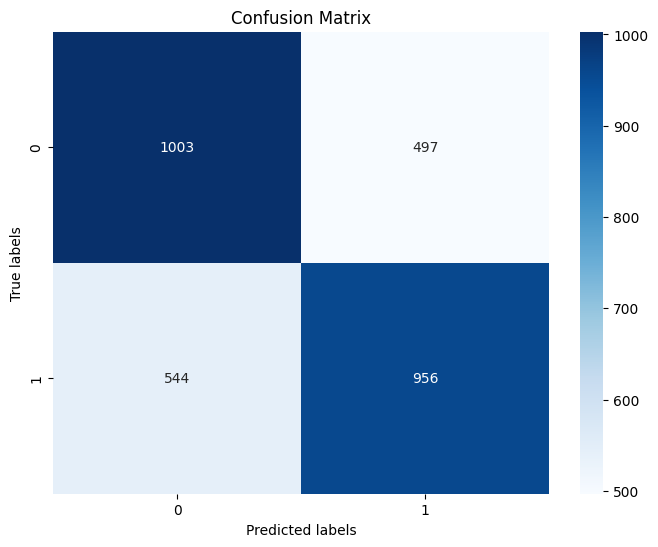

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# 1 ="Home" and 0 = "Non Home"

# Dataset


**Normalisation**

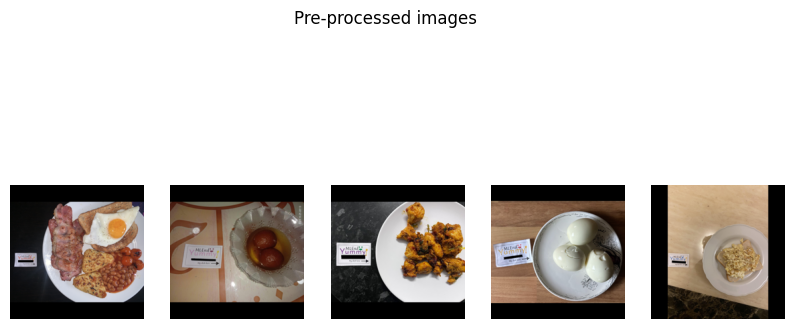

In [92]:
# Display processed training images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.suptitle('Pre-processed images')
plt.show()




# Results

In the absence of **max_depth** and **n_estimators** constraints, the Random Forest Classifier can create an overly complex model by building deep trees and using a large number of trees, which may lead to **overfitting**. which happened to my model. Providing appropriate values for these parameters helps me to prevent overfitting and improves the model's generalization to new accuracy **65.3%** previously it was more than **90%**. Which is an overfitting Case.



# Conclusions

From the confusion matrix:
- **Home (label 1)**: 1003 instances were correctly classified, while 497 were misclassified as "Non Home."
- **Non Home (label 0)**: 956 instances were correctly classified, while 544 were misclassified as "Home."

The model is better at identifying "Home" instances than "Non Home.This tendency towards better recognition of "Home" instances might be influenced by a larger amount of training data available for that category. Despite this imbalance, the model still delivers relatively accurate predictions for "Non Home" instances, suggesting its capability to generalize beyond the imbalanced data distribution in the training set.